In [1]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import lbg_forecast.priors_gp as gp
from astropy.io import ascii
import numpy as np

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


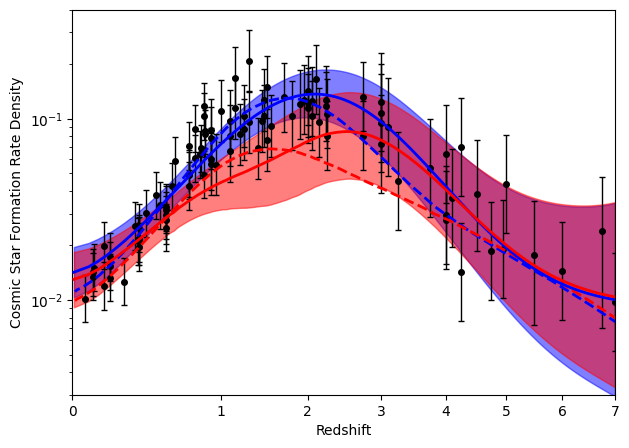

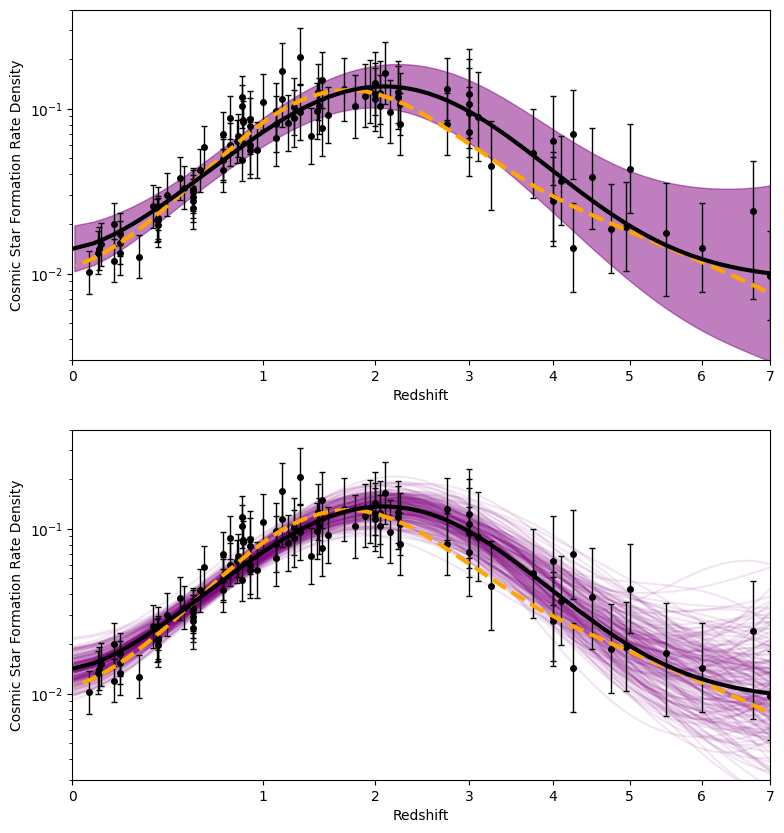

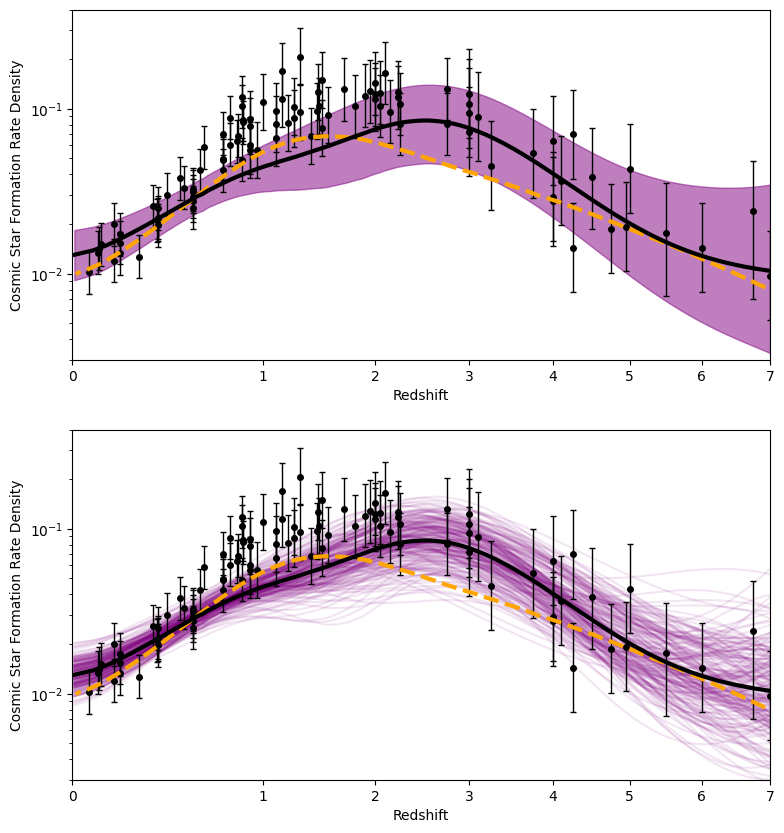

In [2]:
prior = gp.CSFRDPrior()

prior.plot_combined()
prior.plot_observed_csfrds()
prior.plot_true_csfrds()


<ErrorbarContainer object of 3 artists>

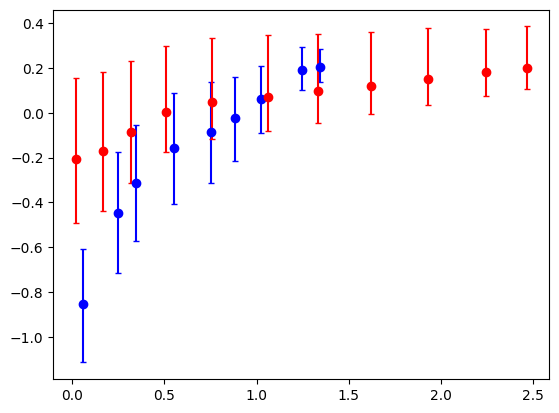

In [4]:
def extract_from_file(file):
    #https://iopscience.iop.org/article/10.3847/1538-4357/aabf3c
    #and popcosmos

    data = ascii.read(file)
    av = np.array(data['x'])
    n = np.array(data['y'])
    n_err_l_val = np.array(data['yl'])
    n_err_h_val = np.array(data['yh'])
    n_err_l = n - n_err_l_val
    n_err_h = n_err_h_val - n
    n_err = n_err_l + n_err_h

    return n, av, n_err, n_err_l, n_err_h


n_salim, av_salim, n_err_salim, n_err_l_salim, n_err_h_salim = extract_from_file("dust_data/salim2018.txt")
n_pop, av_pop, n_err_pop, n_err_l_pop, n_err_h_pop = extract_from_file("dust_data/popcosmos_data.txt")
plt.errorbar(av_salim, n_salim, yerr=[n_err_l_salim, n_err_h_salim], fmt='bo', capsize=2)
plt.errorbar(av_pop, n_pop, yerr=[n_err_l_pop, n_err_h_pop], fmt='ro', capsize=2)